In [694]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


%matplotlib inline

2 - Overview of the Problem set Problem Statement: You are given a dataset ("data.h5") containing:

a training set of m_train images labeled as cat (y=1) or non-cat (y=0) a test set of m_test images labeled as cat or non-cat each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px). You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [695]:
def load_dataset():
    with h5py.File('F:/chirps/catvnoncat/train_catvnoncat.h5', "r") as train_dataset:
        train_set_x_orig = np.array(train_dataset["train_set_x"][:])
        train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    with h5py.File('F:/chirps/catvnoncat/test_catvnoncat.h5', "r") as test_dataset:
        test_set_x_orig = np.array(test_dataset["test_set_x"][:])
        test_set_y_orig = np.array(test_dataset["test_set_y"][:])
        classes = np.array(test_dataset["list_classes"][:])

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [696]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with trainset_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

y = [0], it's a 'non-cat' picture.


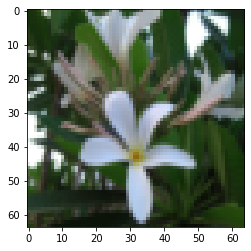

In [697]:
# Example of a picture
index = 9
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [698]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [699]:
nx = train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]
m = train_set_x_orig.shape[0]

In [700]:
train_set_x = train_set_x_orig.reshape(nx,m)
train_set_x = train_set_x / 255
test_set_x = test_set_x_orig.reshape(nx,50)
test_set_x = test_set_x / 255


In [701]:
##Defining Activation functions 
def tanh(z):
    temp = (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
    return temp;

def sigmoid(z):
    temp = 1/(1+np.exp(-z))
    return temp;

def leaky_relu(z):
    temp = (0.01*z)*(z<0)+z*(z>=0)
    return temp

def relu(z):
    temp = 0*(z<0)+z*(z>=0)
    return temp

In [702]:
## Derivatives of Activation function
def grad_tanh(z):
    temp = 1 - tanh(z)*tanh(z)
    return temp

def grad_sigmoid(z):
    temp = sigmoid(z)*(1-sigmoid(z))
    return temp

def grad_leaky_relu(z):
    temp = 0.01*(z<0)+1*(z>=0)
    return temp

def grad_relu(z):
    temp = 0*(z<0)+1*(z>=0)
    return temp

In [703]:
##Parameter no of hidden layer units 
def parameters(nh,nx):
    w1 = np.random.randn(nh,nx)*0.01
    b1 = np.zeros((nh,1))

    w2 = np.random.randn(nh,1)*0.01
    b2 = 0
    return w1,b1,w2,b2

In [704]:
w1, w2, b1, b2 = parameters(6,nx)

In [705]:
alpha = 0.05


for i in range(0,2500):
 
    z1 = np.dot(w1,train_set_x)+b1
    a1 = relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = sigmoid(z2)
    cost = -1*(train_set_y*np.log(a2)+(1-train_set_y)*np.log(1-a2))
    cost = np.sum(cost)/m
    dz2 = a2 - train_set_y
    
    dw2 = (1/m)*np.dot(a1, dz2.T)
    db2 = (1/m)*np.sum(dz2,axis=1, keepdims=True)
    ## In the next line need to provide the derivative of the activation fn 1 used
    
    dz1 = np.dot(w2,dz2)*grad_relu(z1)
    dw1 = (1/m)*np.dot(dz1, train_set_x.T)
    db1 = (1/m)*np.sum(dz1, axis=1,keepdims=True)
    
    ## Now updating the parameters w1, w1, b1, b2
    w2 = w2-alpha*dw2
    b2 = b2-alpha*db2
    w1 = w1-alpha*dw1
    b1 = b1-alpha*db1
    
    if(i%100==0):
        print("value of J with",i, " iternation: ", cost)

value of J with 0  iternation:  0.6931471805599453
value of J with 100  iternation:  0.5937415640676837
value of J with 200  iternation:  0.5576966544821872
value of J with 300  iternation:  0.5542303701476634
value of J with 400  iternation:  0.5387663678143885
value of J with 500  iternation:  0.5238241728810065
value of J with 600  iternation:  0.4533421138146673
value of J with 700  iternation:  0.49990185902844225
value of J with 800  iternation:  0.4945824256208486
value of J with 900  iternation:  0.5298294403644153
value of J with 1000  iternation:  0.3986979935844228
value of J with 1100  iternation:  0.4801203620420631
value of J with 1200  iternation:  0.6271208828231751
value of J with 1300  iternation:  0.6810975129064366
value of J with 1400  iternation:  0.6232181746993019
value of J with 1500  iternation:  0.4957291118825865
value of J with 1600  iternation:  0.4325482466707553
value of J with 1700  iternation:  0.4369642835455726
value of J with 1800  iternation:  0.50

In [706]:
## Defining a prediction fucntion

def predict(w1,b1,w2,b2,X):
    
    z1 = np.dot(w1,X) + b1
    a1 = tanh(z1)
    z2 = np.dot(w2.T,a1) + b2
    a2 = sigmoid(z2)
    y = 0*(a2<=0.5)+1*(a2>0.5)
    assert(y.shape == (1, X.shape[1]))
    return y

In [707]:
y_pred = predict(w1,b1,w2,b2, train_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred - train_set_y)) * 100))

train accuracy: 34.44976076555024 %


In [708]:
y_pred_test = predict(w1,b1,w2,b2, test_set_x)
print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - test_set_y)) * 100))

train accuracy: 66.0 %


In [682]:
accuracy_train.append("train accuracy 6 layers iter=1500 relu:{} %".format(100 - np.mean(np.abs(y_pred - train_set_y)) * 100))

In [683]:
accuracy_test.append("test accuracy 6 layers iter=1500 relu: {} %".format(100 - np.mean(np.abs(y_pred_test - test_set_y)) * 100))

In [684]:
accuracy_train

['train accuracy 4 layers:58.85167464114833 %',
 'train accuracy 5 layers:59.33014354066985 %',
 'train accuracy 8 layers:59.33014354066985 %',
 'train accuracy 15 layers:55.02392344497608 %',
 'train accuracy 10 layers l_rate = 0.008:58.85167464114833 %',
 'train accuracy 5 layers iter=5000:64.59330143540669 %',
 'train accuracy 6 layers iter=9000:68.89952153110048 %',
 'train accuracy 6 layers iter=2500 leaky_relu:81.33971291866028 %',
 'train accuracy 7 layers iter=2500 leaky_relu:81.33971291866028 %',
 'train accuracy 6 layers iter=1500 relu:36.36363636363637 %']

In [685]:
accuracy_test

['test accuracy 4 layers: 66.0 %',
 'test accuracy 5 layers: 66.0 %',
 'test accuracy 8 layers: 66.0 %',
 'test accuracy 15 layers: 66.0 %',
 'test accuracy 10 layers l_rate = 0.008: 66.0 %',
 'test accuracy 5 layers iter=5000: 66.0 %',
 'test accuracy 6 layers iter=9000: 66.0 %',
 'test accuracy 6 layers iter=2500 leaky_relu: 50.0 %',
 'test accuracy 7 layers iter=2500 leaky_relu: 60.0 %',
 'test accuracy 6 layers iter=1500 relu: 66.0 %']

In [ ]:
alpha = 0.009


for i in range(0,9000):
 
    z1 = np.dot(w1,train_set_x)+b1
    a1 = leaky_relu(z1)
    z2 = np.dot(w2.T, a1) + b2
    a2 = sigmoid(z2)
    cost = -1*(train_set_y*np.log(a2)+(1-train_set_y)*np.log(1-a2))
    cost = np.sum(cost)/m
    dz2 = a2 - train_set_y
    
    dw2 = (1/m)*np.dot(a1, dz2.T)
    db2 = (1/m)*np.sum(dz2,axis=1, keepdims=True)
    ## In the next line need to provide the derivative of the activation fn 1 used
    
    dz1 = np.dot(w2,dz2)*(a1*(1-a1))
    dw1 = (1/m)*np.dot(dz1, train_set_x.T)
    db1 = (1/m)*np.sum(dz1, axis=1,keepdims=True)
    
    ## Now updating the parameters w1, w1, b1, b2
    w2 = w2-alpha*dw2
    b2 = b2-alpha*db2
    w1 = w1-alpha*dw1
    b1 = b1-alpha*db1
    
    if(i%100==0):
        print("value of J with",i, " iternation: ", cost)

In [330]:
z1 = np.dot(w1,train_set_x)+b1
a1 = tanh(z1)
z2 = np.dot(w2.T, a1) + b2
a2 = sigmoid(z2)
a2.shape
cost = -1*(train_set_y*np.log(a2)+(1-train_set_y)*np.log(1-a2))
cost = np.sum(cost)/m
dz2 = a2 - train_set_y

In [ ]:
dw2 = np.zeros((4,1))
dw2 = (1/m)*np.dot(a1, dz2.T)
db2 = (1/m)*np.sum(dz2,axis=1, keepdims=True)


In [ ]:
## Initializing w and b for layer 1
w1 = np.random.randn(4,nx)*0.001
b1 = np.zeros((4,1))
## Initializing w2 and b2
w2 = np.random.randn(4,1)*0.001
b2 = 0